In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
import sklearn.mixture as mix 

Testing a small universe of the 10Y Treasury, an Oil ETF, and Tech ETF 

In [20]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 10

Create the subset of assets.

In [21]:
m6 = pd.read_csv('./data/assets_m6.csv')
m6_subset = pd.DataFrame()

for M in assetlist: 
    m6_subset[M] = m6[m6['symbol'] == M]['price'].values

1st-order differencing of the rolling average expectation for each asset. 

In [22]:
m6_subset = m6_subset.apply(np.log).rolling(10).mean().diff().dropna()
print(m6_subset)

          IEF       GSG       IXN
10  -0.001878  0.004799 -0.004710
11  -0.002042  0.002259 -0.002013
12  -0.002037  0.001592 -0.002763
13  -0.001077  0.001889 -0.002938
14   0.000018  0.000861 -0.004356
..        ...       ...       ...
194  0.000290  0.005585 -0.001463
195 -0.000286  0.003399 -0.002283
196 -0.000453 -0.001500 -0.002852
197  0.001061 -0.000679  0.006195
198  0.001369  0.001982  0.004565

[189 rows x 3 columns]


Instantiate a non-parametric clustering model using the dirichlet process. 

In [23]:
dpgmm_model = mix.BayesianGaussianMixture(n_components=num_components, weight_concentration_prior_type='dirichlet_process').fit(m6_subset)

In [24]:
states = dpgmm_model.predict(m6_subset)

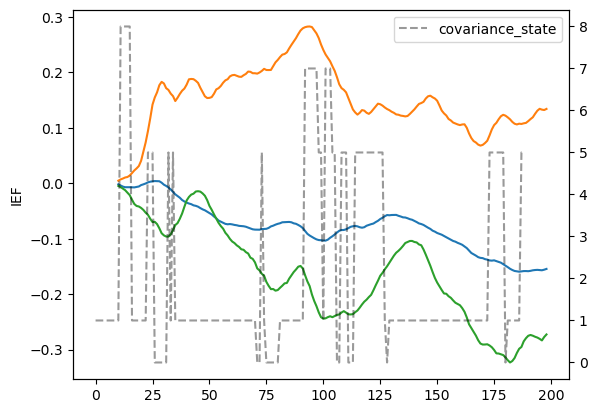

In [25]:
fig,ax = plt.subplots()
axx = ax.twinx()

sns.lineplot(data=states, ax=axx, linestyle='--', color='black', alpha=0.4, label='covariance_state')
sns.lineplot(data=m6_subset['IEF'].cumsum(), ax=ax)
sns.lineplot(data=m6_subset['GSG'].cumsum(), ax=ax)
sns.lineplot(data=m6_subset['IXN'].cumsum(), ax=ax)

axx.legend(loc=0)
plt.show()

In [27]:
state_counts = np.zeros(num_components)
for M in states:
  state_counts[M] += 1 

print(dpgmm_model.means_)
print(state_counts)

[[-0.00088508  0.00451509  0.00388935]
 [-0.00137782  0.00041393 -0.00465928]
 [-0.00082097  0.00071737 -0.00144521]
 [-0.00082089  0.00071722 -0.00144516]
 [-0.0008208   0.00071706 -0.0014451 ]
 [-0.00011906 -0.00171151  0.00496788]
 [-0.00082049  0.00071648 -0.0014449 ]
 [ 0.00189478 -0.00781186  0.00039928]
 [ 0.00080901  0.01540527 -0.00429022]
 [-0.00081713  0.00071023 -0.00144269]]
[ 21. 119.   0.   0.   0.  35.   0.   9.   5.   0.]
